# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_frame = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
data_frame.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
data_frame['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_frame.loc[data_frame.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index = data_frame[(data_frame['Mouse ID']=='g989')].index
cleaned_data = data_frame.drop(index)
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = cleaned_data.set_index(['Drug Regimen']).groupby('Drug Regimen')
drug_mean = drug_regimen['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen['Tumor Volume (mm3)'].median()
drug_var = drug_regimen['Tumor Volume (mm3)'].var()
drug_std = drug_regimen['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen['Tumor Volume (mm3)'].sem()

drug_df = pd.DataFrame({"Tumor Volume Mean": drug_mean,
                        "Tumor Volume Median": drug_median,
                        "Tumor Volume Variance": drug_var,
                        "Tumor Volume Standard Dev": drug_std,
                        "Tumor Volume SEM": drug_sem})
drug_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

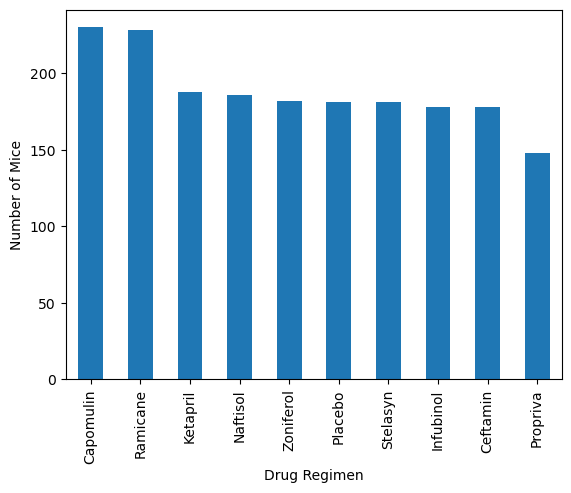

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#New variable for drug regimen and timepoint columns
drug_mice = cleaned_data[["Drug Regimen","Timepoint"]]

#Count per drug
mice_per_drug = drug_mice["Drug Regimen"].value_counts()
mice_per_drug

mice_per_drug.plot(kind="bar",
              xlabel="Drug Regimen",
              ylabel="Number of Mice")
plt.show()


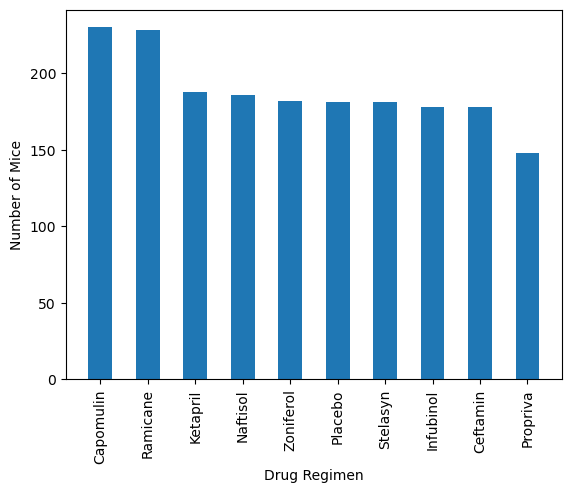

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = mice_per_drug.index
mice = mice_per_drug.values

plt.bar(drug, mice, width=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=90)
plt.show()

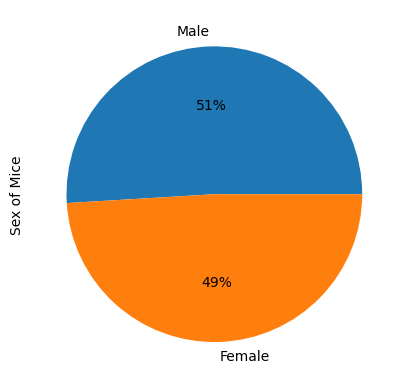

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_data["Sex"].value_counts()
gender = ["Male", "Female"]

mice_gender.plot(kind="pie", autopct='%1.0f%%', ylabel="Sex of Mice")
plt.show()


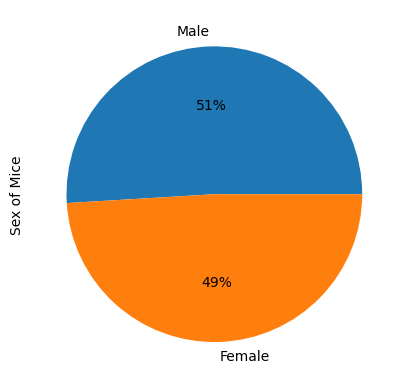

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = mice_gender.index
gender_count = mice_gender.values
plt.ylabel("Sex of Mice")
plt.pie(gender_count, labels=gender_labels, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

target_drugs = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") | 
                                    (cleaned_data["Drug Regimen"] == "Ramicane") |
                                    (cleaned_data["Drug Regimen"] == "Infubinol") |
                                    (cleaned_data["Drug Regimen"] == "Ceftamin") ]

# Start by getting the last (greatest) timepoint for each mouse
mice_time = target_drugs.groupby(["Drug Regimen", "Mouse ID"]).last()
new_mice_time = mice_time.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(data_frame, new_mice_time, on='Mouse ID')
merged_df.head(15)


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1
5,k403,Ramicane,Male,21,16,25,33.464577,1,Ramicane,Male,21,16,45,22.050126,1
6,k403,Ramicane,Male,21,16,30,31.099498,1,Ramicane,Male,21,16,45,22.050126,1
7,k403,Ramicane,Male,21,16,35,26.546993,1,Ramicane,Male,21,16,45,22.050126,1
8,k403,Ramicane,Male,21,16,40,24.365505,1,Ramicane,Male,21,16,45,22.050126,1
9,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,45,22.050126,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in target_drugs:
    quartiles = merged_df[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 


    # Determine outliers using upper and lower bounds


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
